<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Работа-с-пропусками" data-toc-modified-id="Работа-с-пропусками-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Работа с пропусками</a></span></li><li><span><a href="#Скейлинг" data-toc-modified-id="Скейлинг-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Скейлинг</a></span></li><li><span><a href="#Первые-фиты" data-toc-modified-id="Первые-фиты-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Первые фиты</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Апсемплинг" data-toc-modified-id="Апсемплинг-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Апсемплинг</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

Признаки

- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

Целевой признак

- Exited — факт ухода клиента

## Подготовка данных

In [1]:
#!pip install scikit-learn --user --upgrade

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.svm import SVC
from sklearn.impute import KNNImputer
from sklearn.utils import shuffle, resample
from sklearn.metrics import f1_score, roc_auc_score, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, RandomizedSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import validation_curve

RS = 451
import warnings
warnings.filterwarnings('ignore')

In [3]:
try:
    df = pd.read_csv('/datasets/Churn.csv')
except:
    df = pd.read_csv('datasets/Churn.csv')
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1


In [4]:
df = df.drop(labels='RowNumber', axis=1)
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           9091 non-null   float64
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1015.8+ KB


Имеется некоторое количество пропусков в столбце Tenure, попробуем посмотреть, как они выглядят, чтобы выработать стратегию обработки. Заодно перемапим пол в удобные формат.
Кажется, нам вряд ли пригодятся имена и айди, но разберёмся с ними чуть позже.

In [5]:
df.Gender = df.Gender.map({'Female':0, 'Male':1})

In [6]:
df[df.Tenure.isna()].head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,15589475,Azikiwe,591,Spain,0,39,NaN,0.00,3,1,0,140469.38,1
48,15766205,Yin,550,Germany,1,38,NaN,103391.38,1,0,1,90878.13,0
51,15768193,Trevisani,585,Germany,1,36,NaN,146050.97,2,0,0,86424.57,0
53,15702298,Parkhill,655,Germany,1,41,NaN,125561.97,1,0,0,164040.94,1
60,15651280,Hunter,742,Germany,1,35,NaN,136857.00,1,0,0,84509.57,0


## Исследование задачи

In [7]:
df = df.drop(labels=['CustomerId', 'Surname'], axis=1)

In [8]:
df.Tenure.value_counts().sort_index()

0.0     382
1.0     952
2.0     950
3.0     928
4.0     885
5.0     927
6.0     881
7.0     925
8.0     933
9.0     882
10.0    446
Name: Tenure, dtype: int64

In [9]:
assert df.duplicated().sum() == 0

### Работа с пропусками

In [10]:
df_drop = df.dropna()

Думаю, проще всего удалить пропуски на данном этапе. Беглый осмотр показал, что значения *Tenure* распределены от 0 до 10 и указаны в годах. Вполне вероятно, что пропущенные значения принадлежат тем клиентам, кто пользуется услугами банка больше 11 лет. 

In [11]:
df_filled = df.copy()

In [12]:
df[df.Tenure.isna()].groupby('Age').count().head(5)

,CreditScore,Geography,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Age,,,,,,,,,,
18,2,2,2,0,2,2,2,2,2,2
19,1,1,1,0,1,1,1,1,1,1
20,3,3,3,0,3,3,3,3,3,3
21,5,5,5,0,5,5,5,5,5,5
22,4,4,4,0,4,4,4,4,4,4


In [13]:
df_drop = df_drop.join(pd.get_dummies(df_drop.Geography, drop_first=True))
df_filled = df_filled.join(pd.get_dummies(df_filled.Geography, drop_first=True))

In [14]:
df_drop = df_drop.drop(labels='Geography', axis=1)
df_filled = df_filled.drop(labels='Geography', axis=1)

Страна заменена дамми-переменными с удалением оригинала и одного из дамми столбцов.

In [15]:
imp = KNNImputer(missing_values=np.nan)
df_filled = imp.fit_transform(df_filled)

In [16]:
df_filled = pd.DataFrame(df_filled)
df_filled.columns = df_drop.columns

### Скейлинг

 Взглянем на общую статистику по данным. Это поможет выбрать нужный скейлер:

In [17]:
df_filled.describe().drop(labels=['Germany', 'Spain'],
                          axis=1).T.drop('count', axis=1).style.background_gradient(cmap='PuBu')

,mean,std,min,25%,50%,75%,max
CreditScore,650.528800,96.653299,350.000000,584.000000,652.000000,718.000000,850.000000
Gender,0.545700,0.497932,0.000000,0.000000,1.000000,1.000000,1.000000
Age,38.921800,10.487806,18.000000,32.000000,37.000000,44.000000,92.000000
Tenure,4.998900,2.784982,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,76485.889288,62397.405202,0.000000,0.000000,97198.540000,127644.240000,250898.090000
NumOfProducts,1.530200,0.581654,1.000000,1.000000,1.000000,2.000000,4.000000
HasCrCard,0.705500,0.455840,0.000000,0.000000,1.000000,1.000000,1.000000
IsActiveMember,0.515100,0.499797,0.000000,0.000000,1.000000,1.000000,1.000000
EstimatedSalary,100090.239881,57510.492818,11.580000,51002.110000,100193.915000,149388.247500,199992.480000
Exited,0.203700,0.402769,0.000000,0.000000,0.000000,0.000000,1.000000


Вполне подходит для стандартного. Да, баланс как будто бы немного в аутлаерах, но всё остальное - окей. Уже здесь по среднему Exited 0.20 виден перекос классов. 

In [18]:
features = df_filled.drop(labels='Exited', axis=1)
target = df_filled.Exited

In [19]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=.2, random_state=RS, stratify=target)
x_train1, x_val, y_train1, y_val = train_test_split(x_train, y_train, test_size=.25, random_state=RS, stratify=y_train)

In [20]:
col_names = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts']
first, second, third, forth = x_train1[col_names], x_val[col_names], x_test[col_names], x_train[col_names]
sc = StandardScaler().fit(first.values)
first = sc.transform(first.values)
second = sc.transform(second.values)
third = sc.transform(third.values)
forth = sc.transform(forth.values)
x_train1[col_names], x_val[col_names], x_test[col_names], x_train[col_names] = first, second, third, forth

Данные разбиты на фолды, попробуем применить случайный лес:

Добавим серьёзного подхода к подбору параметров. Думаю, регуляризация в виде альфы тут не особо нужна, равно как и запары с количеством фичей.
Эмпирически: серьёзной разницы между энтропи гейном и джини гейном почти нет. Сосредоточимся на количестве древ и глубине.
Естественно, стохастическая природа алгоритмов может выдать отличающийся вариант. Я даже догадываюсь, как это исправить, вроде как раз у Дьяконова видел, либо где-то на хабре.
Нам бы график с результатами (желательно грида, а не рандома), на котором мы сможем увидеть тенденции и распределение результата по разным гиперпарамам. Это позволит выйти на действительный оптимум, а не поймать локальный экстремум. Вокруг действительного оптимума даже можно взять несколько моделей, которые потом состакать. Ансамбли, вот это вот всё. =)

### Первые фиты

Здесь стратифицированная К-фолдовая классически бьёт на 5 фолдов, всё это не слишком долго пробегается сотней итераций, причём применяем мы это в первому трейну, который без теста, но с валидом вместе. У нас же кросс-валид.

In [21]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=RS)
model = RandomForestClassifier(n_jobs=-1, class_weight='balanced')
space = dict()
space['n_estimators'] = range(50, 200, 5)
space['max_depth'] = range(5,33)

search = RandomizedSearchCV(model, space, n_iter=100, scoring='f1', n_jobs=-1, cv=cv, random_state=RS)
result = search.fit(x_train, y_train)
rf_score = result.best_score_
rf_params = result.best_params_
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.6158532949092498
Best Hyperparameters: {'n_estimators': 170, 'max_depth': 10}


In [22]:
model = RandomForestClassifier(n_jobs=-1, class_weight='balanced')

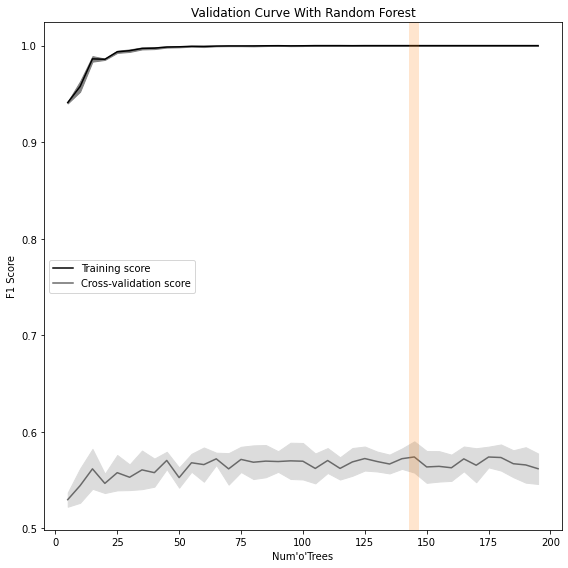

In [23]:
param_range = range(5, 200, 5)
train_scores, test_scores = validation_curve(model,
                                             x_train, y_train,
                                             scoring='f1', param_name='n_estimators', 
                                             param_range=param_range, n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(8,8))
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")
 
plt.title("Validation Curve With Random Forest")
plt.xlabel("Num'o'Trees")
plt.ylabel("F1 Score")
plt.tight_layout()
plt.legend(loc="best")
plt.axvline(param_range[np.argmax(test_mean)], color='C1', lw=10, alpha=0.2)
plt.show()

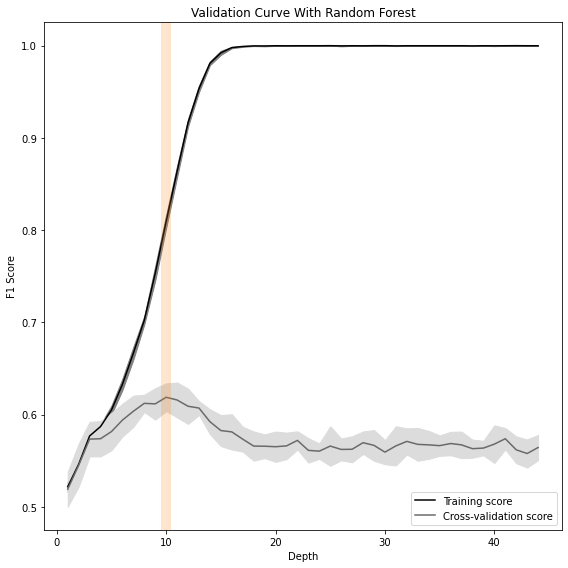

In [24]:
param_range = range(1, 45)
train_scores, test_scores = validation_curve(model,
                                             x_train, y_train,
                                             scoring='f1', param_name='max_depth', 
                                             param_range=param_range, n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(8,8))
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")
 
plt.title("Validation Curve With Random Forest")
plt.xlabel("Depth")
plt.ylabel("F1 Score")
plt.tight_layout()
plt.legend(loc="best")
plt.axvline(param_range[np.argmax(test_mean)], color='C1', lw=10, alpha=0.2)
plt.show()

Для удобства создана функция фита на трейн с рассчётом целевой метрики и ROC кривой. Все модели уже на этом этапе 
учитывают дисбаланс, который мы обнаружили выше. Посмотрим, как они себя ведут

In [25]:
final = []
def fitting(model, x_train=x_train1, y_train=y_train1, x_val=x_val, y_val=y_val):
    model.fit(x_train, y_train)
    pred = model.predict(x_val)
    print('F1 score test:', f1_score(y_val, pred))
    print('ROC AUC test:', roc_auc_score(y_val, model.predict_proba(x_val)[:, 1]))
    RocCurveDisplay.from_estimator(model.fit(x_train, y_train), x_val, y_val)
    final.append([str(model), round(f1_score(y_val, pred)*100,2), 
                round(roc_auc_score(y_val, model.predict_proba(x_val)[:, 1])*100,2)])

F1 score test: 0.5796737766624843
ROC AUC test: 0.8527579687653957


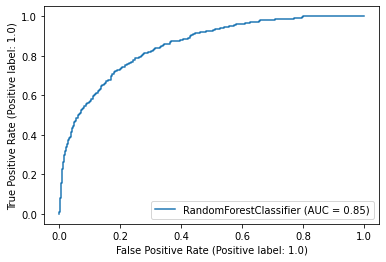

In [26]:
model = RandomForestClassifier(random_state=RS, n_estimators=81, max_depth=10, class_weight='balanced')
fitting(model)

Даже без любой игры с дисбалансом имеем 58% Ф1 скор, что вполне окей. На более крупной обучающей выборке результат был получше, после изменения разбиения точно стоит смотреть в сторону балансировки классов =)

F1 score test: 0.48823016564952054
ROC AUC test: 0.7605644644792591


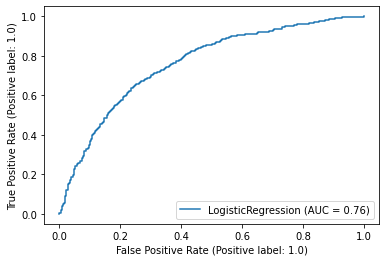

In [27]:
fitting(LogisticRegression(class_weight='balanced'))

F1 score test: 0.5086887835703002
ROC AUC test: 0.8262328800867081


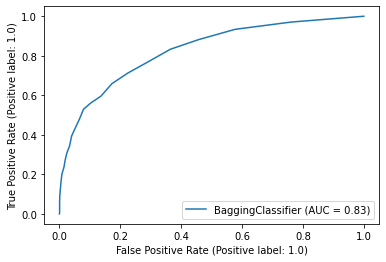

In [28]:
fitting(BaggingClassifier(base_estimator=ExtraTreeClassifier(class_weight='balanced'), n_estimators=25, random_state=RS))

F1 score test: 0.5812310797174571
ROC AUC test: 0.8393560941964724


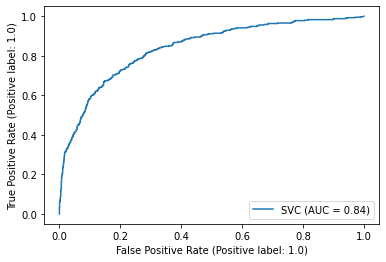

In [29]:
fitting(SVC(class_weight='balanced', probability=True))

Пока что самым приятным выглядит саппорт вектор, однако, после перебалансировки классов всё может измениться. К тому же, лес идёт прямо за ним.

## Борьба с дисбалансом

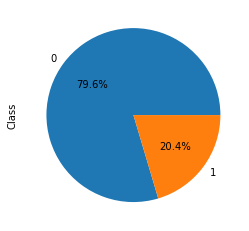

In [30]:
df_drop.groupby('Exited').size().plot(kind='pie',
                                       y = "Exited",
                                       label = "Class",
                                       autopct='%1.1f%%');

Действительно, наблюдаемый дисбаланс стоит попробовать исправить апсемплом ака бутстрапом:

### Апсемплинг

Данные отсемплированы с увеличением меньшего класса, объединены и перемешаны. 

In [31]:
full_train = x_train1.join(y_train1)

In [32]:
upsampled = resample(full_train[full_train.Exited == 1],  
                     n_samples=len(full_train[full_train.Exited == 0]), random_state=RS)

In [33]:
full_train = pd.concat([full_train[full_train.Exited == 0], upsampled])
full_train = full_train.sample(frac=1)

In [34]:
x_train1 = full_train.drop('Exited', axis=1)
y_train1 = full_train.Exited

F1 score test: 0.5164473684210527
ROC AUC test: 0.8446521824810326


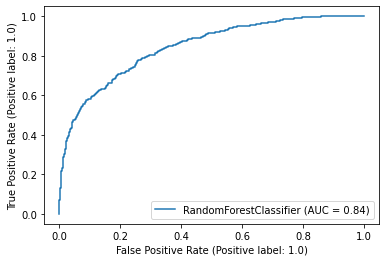

In [35]:
model = RandomForestClassifier(random_state=RS, n_estimators=82, max_depth=10)
fitting(model)

Для леса изменения несущественны

F1 score test: 0.2872727272727273
ROC AUC test: 0.7569003103754064


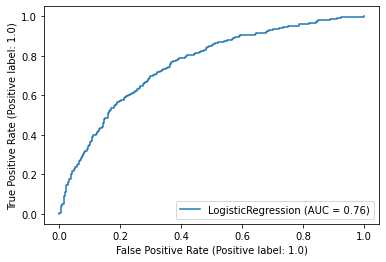

In [36]:
fitting(LogisticRegression())

F1 score test: 0.49762282091917603
ROC AUC test: 0.8068043957532762


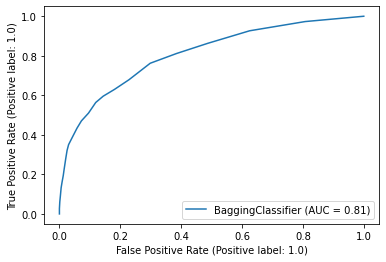

In [37]:
fitting(BaggingClassifier(base_estimator=ExtraTreeClassifier(), n_estimators=25, random_state=RS))

F1 score test: 0.4727891156462586
ROC AUC test: 0.8117663993989557


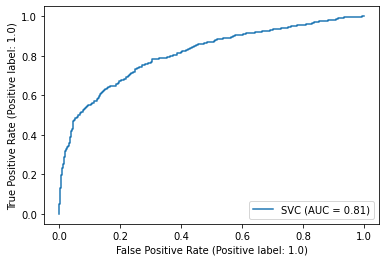

In [38]:
fitting(SVC(probability=True, gamma='auto'))

## Тестирование модели

In [39]:
final = pd.DataFrame(final).sort_values(by=1, ascending=False)
columns = ['model', 'f1', 'roc_auc']
final.columns = columns

In [40]:
pd.set_option('display.max_colwidth', None)
final

,model,f1,roc_auc
3,"SVC(class_weight='balanced', probability=True)",58.12,83.92
0,"RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=82,\n random_state=451)",57.97,85.28
4,"RandomForestClassifier(max_depth=10, n_estimators=82, random_state=451)",51.64,84.47
2,"BaggingClassifier(base_estimator=ExtraTreeClassifier(class_weight='balanced'),\n n_estimators=25, random_state=451)",50.87,82.62
6,"BaggingClassifier(base_estimator=ExtraTreeClassifier(), n_estimators=25,\n random_state=451)",49.76,80.68
1,LogisticRegression(class_weight='balanced'),48.82,76.06
7,"SVC(gamma='auto', probability=True)",47.28,81.17
5,LogisticRegression(),28.73,75.69


F1 score test: 0.6304604486422668
ROC AUC test: 0.8607960811350642


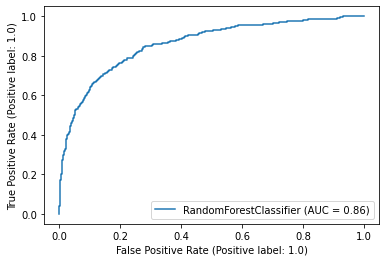

In [41]:
model = RandomForestClassifier(max_depth=10, n_estimators=82, random_state=RS, class_weight='balanced')
fitting(model, x_train, y_train, x_test, y_test)

F1 score test: 0.585603112840467
ROC AUC test: 0.8514801396157328


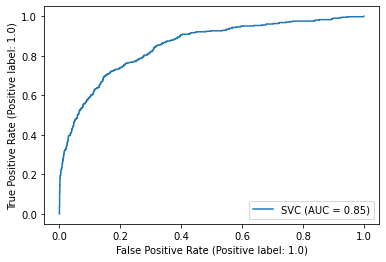

In [42]:
fitting(SVC(probability=True, class_weight='balanced'),
       x_train, y_train, x_test, y_test)

Учитывая, что параметры саппорт вектора вообще не тюнились, его всё ещё можно рассматривать как неплохого кандидата. 

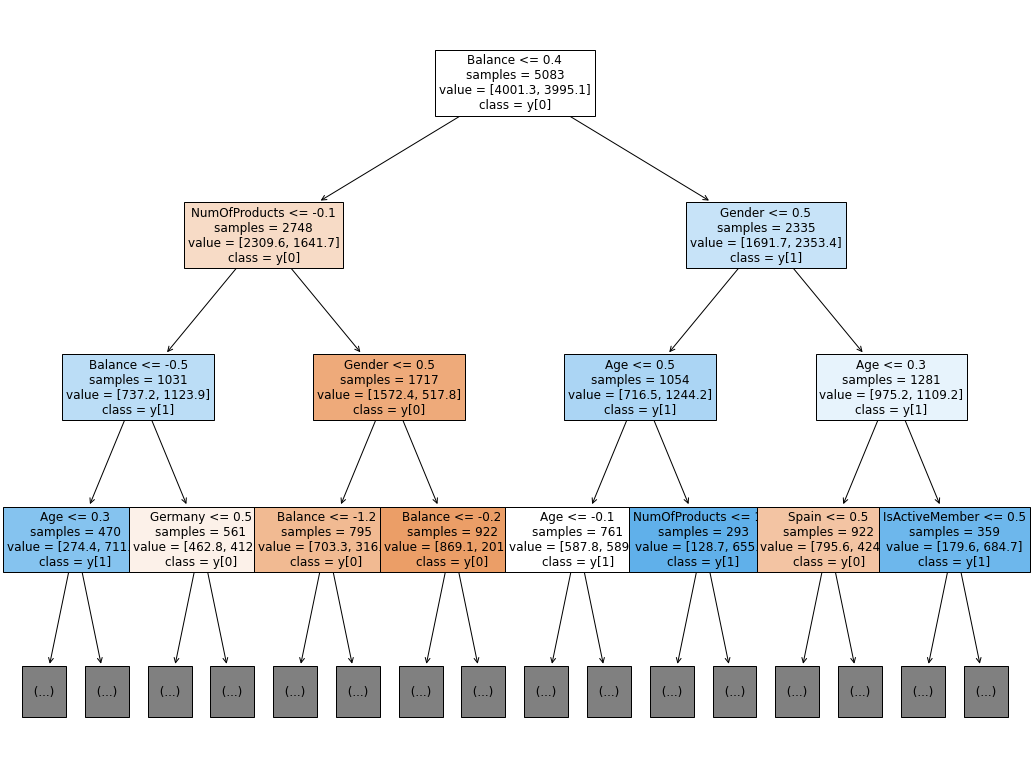

In [43]:
plt.figure(figsize=(18,14))
plot_tree(model.estimators_[0], fontsize=12, feature_names=features.columns, max_depth=3, label='all', filled=True, 
         impurity=False, precision=1, class_names=True);

Итого: данные об абонентах были обработаны, категориальные фичи заполнены дамми-переменными, бесполезные, к примеру, имена, были отброшены, а пропуски заполнены по методу ближейших соседей.  
Далее всё приведено к одному масштабу путём применения стандарт скейлера (всё же в робасте здесь не было надобности — выбросов мало).  
Оттюнена и визуализирована в процессе модель случайного леса. Правда, на финальном плоте интерпретируемость довольно низкая: многие переменные уже после скейлинга. Первый же шаг "Balance <= 0.4". Сколько это в реальных деньгах? Сложно сказать, не распаковывая всё ревёрс инжинирингом.  
Путём несложных манипуляций с гиперпараметрами получен скор 63% на валидации. Разумеется, можно ещё многое предпринять в рамках экспериментов и кагл-стайл борьбы за тысячные доли. Как минимум даже в рамках хобби не были осмотрены матрицы корреляций или ковариаций. С их помощью можно было выйти на фичаинжиниринг, удаляя или создавая новые.  
Впрочем, сутками считать полиномы 15 степени не особо хочется  
утрирую, конечно. кому они нужны в таком количестве, потом ещё через лассо их в 0 обратно сводить как неважные.  

ну или <a href="https://towardsdatascience.com/boruta-explained-the-way-i-wish-someone-explained-it-to-me-4489d70e154a">борутой</a> искать)


Вопросов почти не осталось, некоторые моменты ещё выносим на обсуждение в слаке. Спасибо за хорошие ссылки! Всё сразу не укладывается, конечно, но впереди ещё выходные. Почти ничего не прочитал про learning curve, так как сразу понял, что мой выбор сегодня — validation :D